# Coffee Bean Health Detection using Ocatve in ipynb.


## Installation

In [0]:
!apt-get update
!apt install octave

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [132 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:11 https://developer.download.nvidia.com/compute/machine-

In [0]:
!apt-get install liboctave-dev
!pip install oct2py
%reload_ext oct2py.ipython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 liboctave-dev
0 upgraded, 5 newly installed, 0 to remove and 86 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 23.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-quad3 amd64 3.3.7-1 [552 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-bin amd64 3.3.7-1 [32.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd

In [0]:
%%octave
pkg install -forge image
pkg load image

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

For information about changes from previous versions of the image package, run 'news image'.

## Overview

When using the cell magic, `%%octave` (note the double `%`), multiple lines of Octave can be executed together.  Unlike
with the single cell magic, no value is returned, so we use the `-i` and `-o` flags to specify input and output variables.  Also note the use of the semicolon to suppress the Octave output.

## Imaging

Image output is automatically captured and displayed, and using the `-f` flag you may choose its format (currently, `png` and `svg` are supported).

The width or the height can be specified to constrain the image while maintaining the original aspect ratio.

Multiple figures can be drawn.  Note that when using imshow the image will be created as a PNG with the raw
image dimensions.

Plots can be drawn inline (default) or bring up the Octave plotting GUI by using the -g (or --gui) flag: 

In [0]:
import requests

img_data = requests.get('https://i.ibb.co/hd7gxky/IMG-5694.jpg').content
with open('coffee.jpg', 'wb') as handler:
    handler.write(img_data)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd gdrive

In [0]:
!ls

coffee.jpg  gdrive  sample_data


a = -6.1976

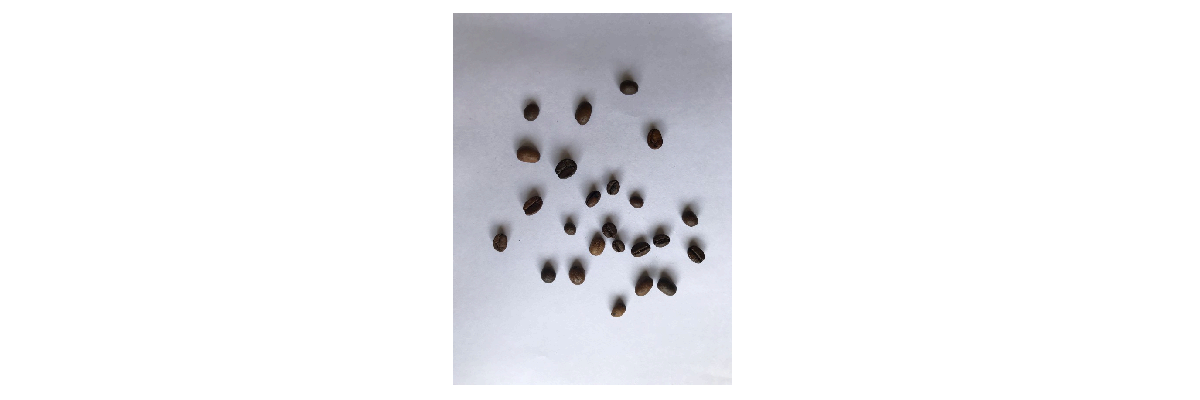

In [0]:
%%octave -s 1200,400 -f png
a = imshow('coffee.jpg')

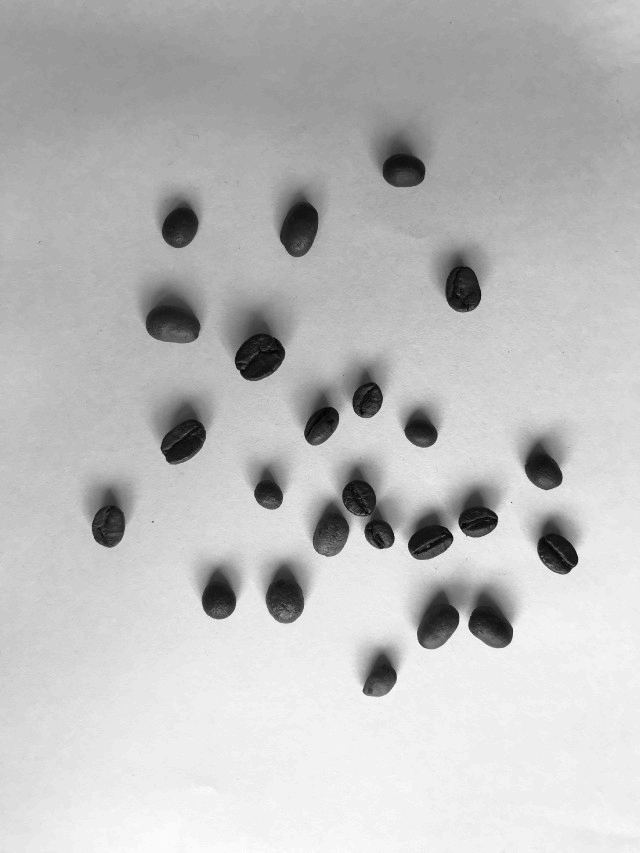

In [0]:
%%octave -s 600,200 -f png
bw_img = rgb2gray(imread('coffee.jpg'));
figure
imshow(bw_img)

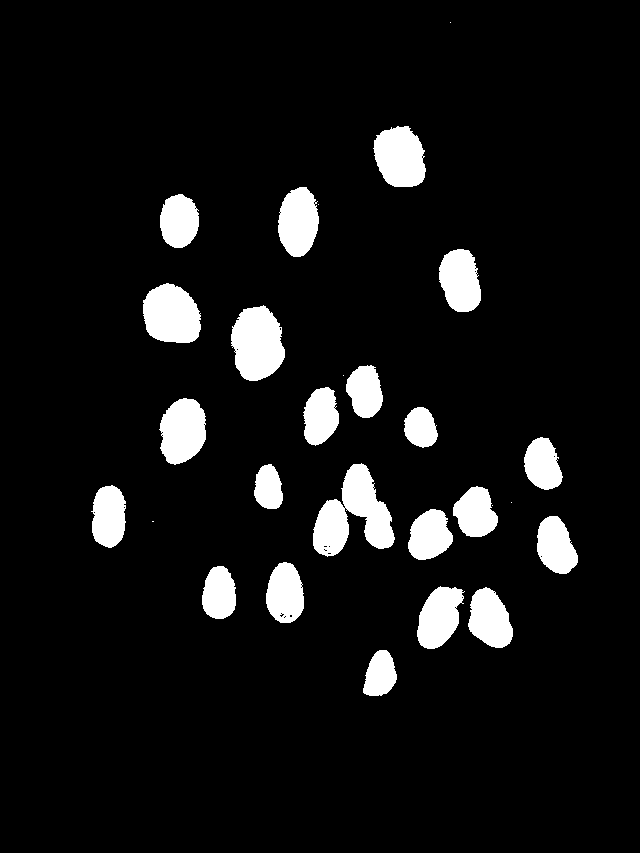

In [0]:
%%octave -s 600,200 -f png
bin_img = imclearborder(imcomplement(im2bw(rgb2gray(imread('coffee.jpg')),0.5)));
figure
imshow(bin_img)

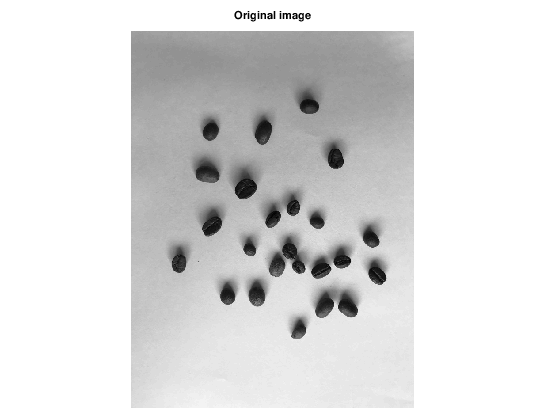

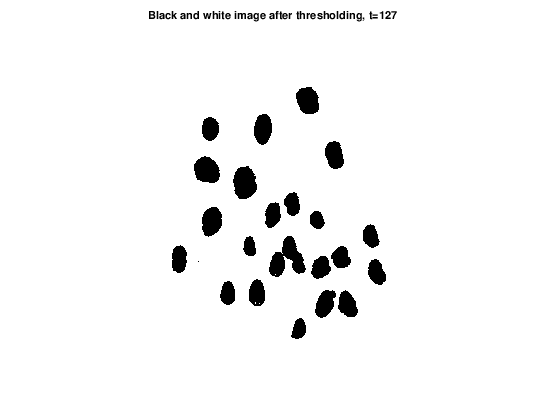

In [0]:
 %%octave
 I = max (phantom (), 0);
 figure; imshow (bw_img);
 title ("Original image");
 h = imhist (bw_img);
 t = otsuthresh (h);
 J = im2bw (imsmooth(bw_img, "Gaussian"));
 figure; imshow (J);
 title_line = sprintf ("Black and white image after thresholding, t=%g",
                       t*255);
 title (title_line);

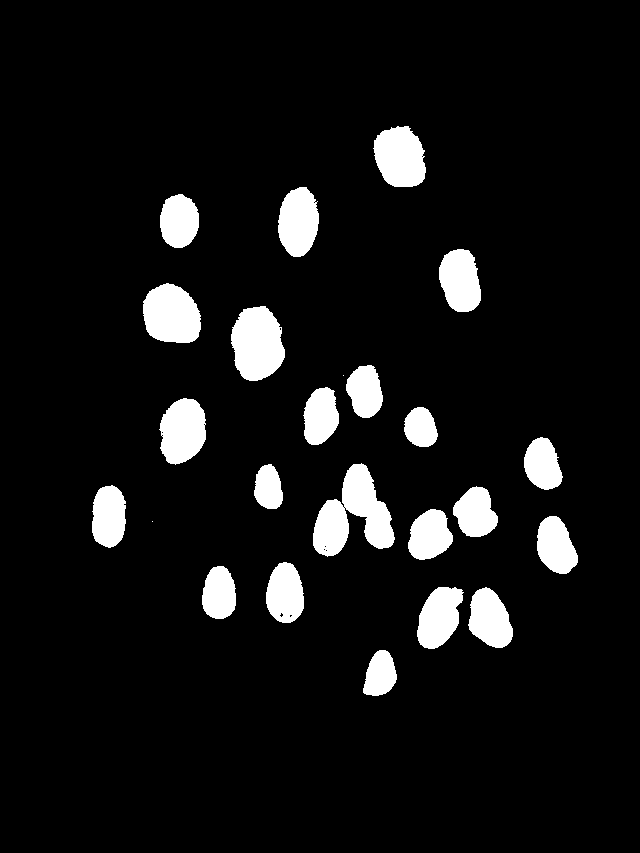

In [0]:
%%octave -s 600,200 -f png
new_bin_img = imclearborder(imcomplement(J));
figure
imshow(new_bin_img)

In [0]:
%%octave
thresharea = bwarea(bin_img)

otsuarea = bwarea(new_bin_img)

thresharea =    4.2542e+04

otsuarea =    4.2543e+04

In [0]:
%%octave
c = [1,12,146,410];
r = [1,104,156,129];
pixels = impixel(imread('coffee.jpg'),c,r)
for i = 1:rows(pixels)
disp(pixels(i,1)+pixels(i,2)+pixels(i,3))
endfor

pixels =

   158   157   163

   151   150   158

   170   168   179

   126   125   133

 478

 459

 517

 384

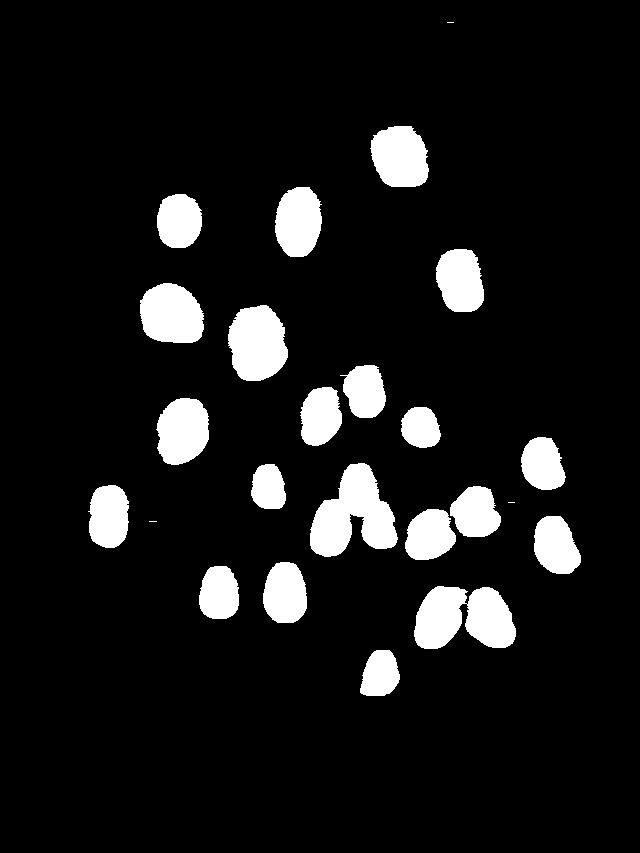

In [0]:
%%octave -s 600,200 -f png
dil_img = imdilate(imdilate(imdilate(bin_img,[1,1,1]),[1,1,1]),[1,1,1]);
figure
imshow(dil_img)

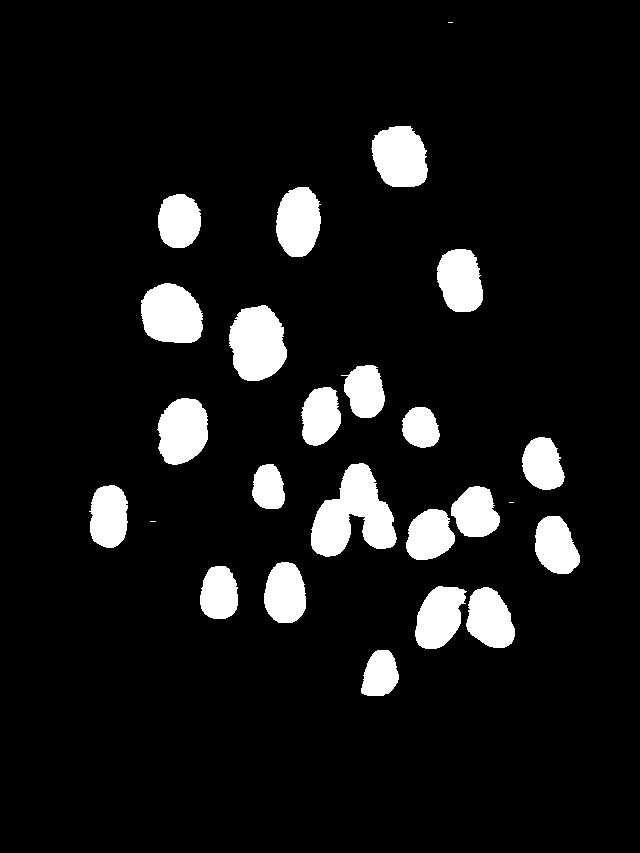

In [0]:
%%octave -s 600,200 -f png
erod_img = imerode(dil_img,[1,1,1]);
figure
imshow(erod_img)

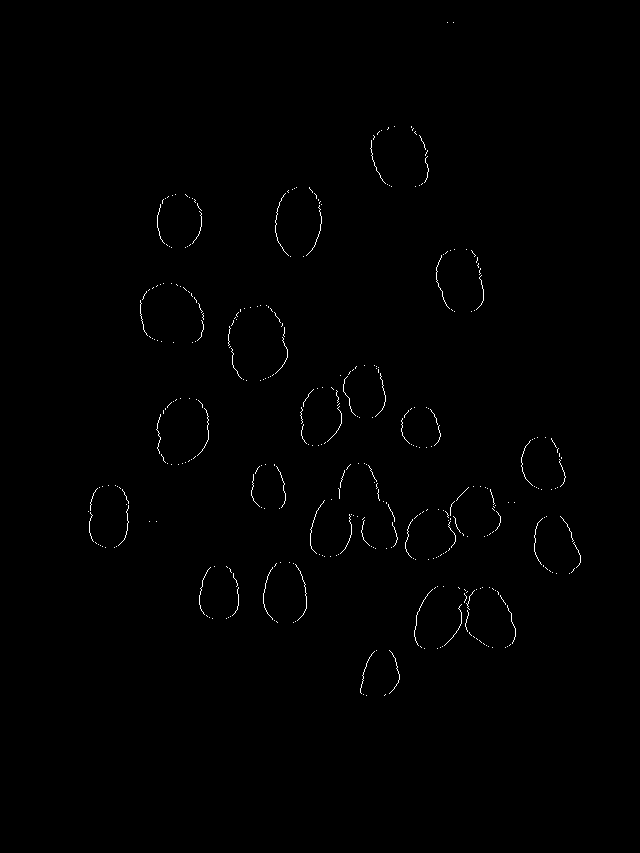

In [0]:
%%octave -s 600,200 -f png
imshow(dil_img-erod_img)

In [0]:
%%octave
whos a

Variables in the current scope:

   Attr Name        Size                     Bytes  Class

   ==== ====        ====                     =====  =====

        a           1x1                          8  double

Total is 1 element using 8 bytes

t = -7.3687

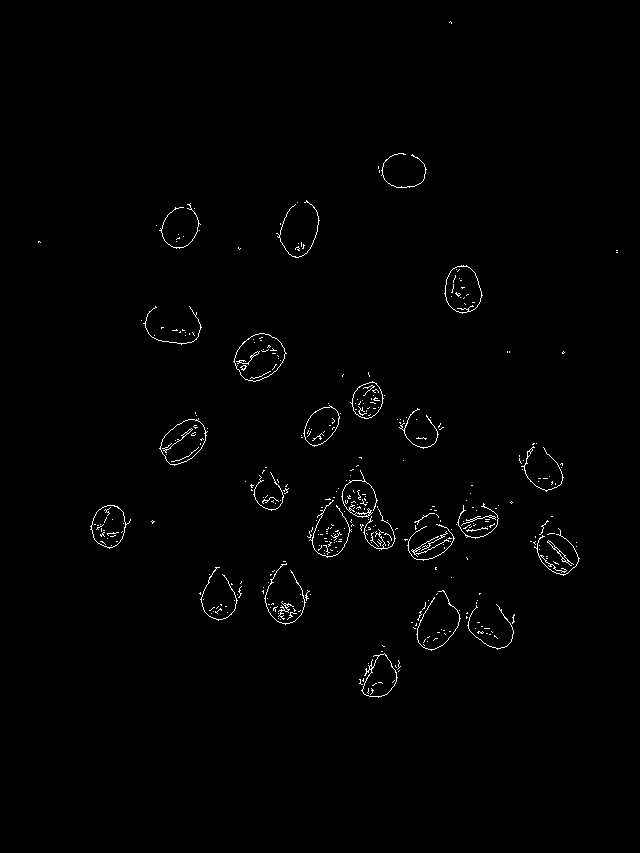

In [0]:
%%octave
t=imshow(edge(bw_img, "Sobel"))

t = -7.5216

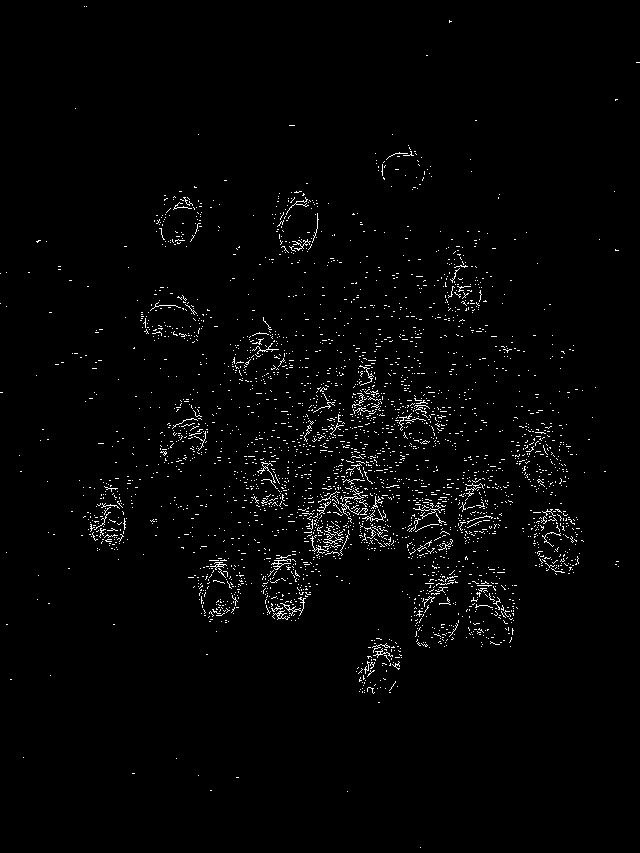

In [0]:
%%octave
t=imshow(edge(bw_img, "Roberts"))

t = -7.2047

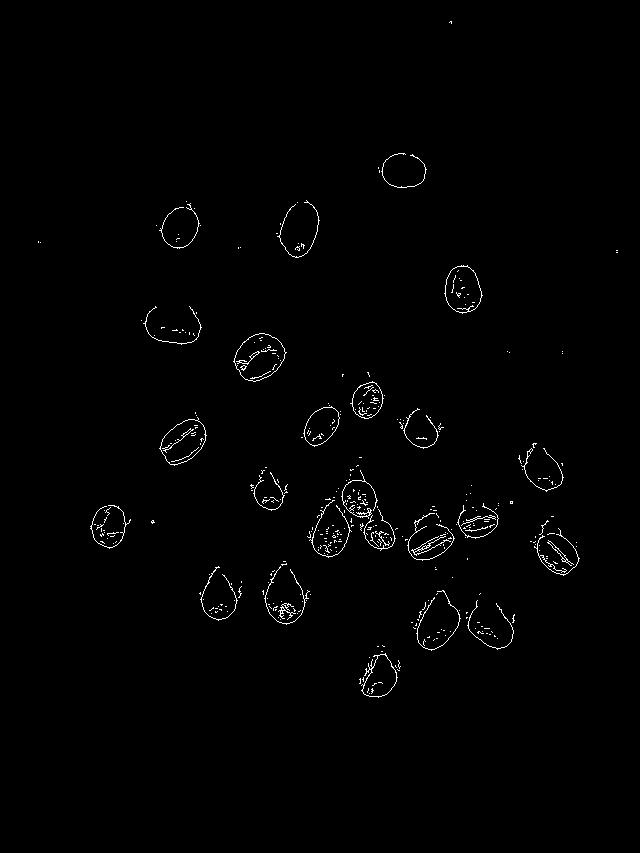

In [0]:
%%octave
t=imshow(edge(bw_img, "Prewitt"))

In [0]:
%%octave
k=imhist(g)
length(k)

k =

      168

       11

       58

        5

       25

       25

       69

       47

       54

       42

       43

       44

       29

       62

       47

       69

       63

       83

      106

       92

      122

      127

      130

      158

      153

      148

      171

      181

      192

      210

      217

      217

      246

      242

      273

      301

      320

      305

      311

      340

      314

      335

      372

      342

      375

      367

      359

      364

      377

      372

      406

      420

      371

      413

      390

      423

      410

      424

      460

      383

      453

      440

      505

      457

      467

      496

      481

      500

      485

      502

      552

      498

      494

      500

      506

      552

      536

      510

      536

      515

      540

      556

      534

      543

      582

      489

      565

      525

      500

      588

      558

      554

      522

      541

      530

      508

      543

      527

      541

      565

      525

      533

      531

      541

      538

      493

      479

      544

      501

      516

      487

      524

      466

      484

      492

      526

      513

      540

      539

      576

      525

      561

      550

      502

      524

      521

      516

      491

      471

      579

      518

      591

      538

      548

      497

      519

      477

      519

      610

      533

      469

      481

      485

      471

      418

      465

      437

      384

      397

      326

      335

      367

      352

      333

      379

      315

      313

      347

      304

      294

      291

      275

      267

      276

      254

      261

      285

      245

      255

      242

      248

      230

      218

      222

      206

      228

      192

      191

      175

      178

      171

      154

      188

      172

      216

      170

      205

      188

      166

      173

      170

      151

      140

      143

      149

      146

      137

      167

      136

      154

      158

      155

      172

      140

      188

      154

      153

      159

      192

      197

      203

      166

      214

      167

      164

      188

      146

      155

      150

      158

      176

      119

      172

      188

      170

      190

      188

      176

      203

      181

      179

      187

      229

      263

      226

      281

      274

      275

      301

      309

      394

      473

      484

      527

      540

      545

      603

      716

      863

      854

     1172

     1342

     2656

     8032

   107388

   102037

ans =  256

In [1]:
!pip install fastai

In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai.vision import *

In [0]:
path = Path('/content/drive/My Drive/dip paper')

In [0]:
folder = ['Defected coffee beans', 'Mixed coffee beans ', 'Perfect coffee beans']
files = [x + '-coffee.csv' for x in folder]

In [65]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/dip paper


In [8]:
cd My\ Drive

/content/drive/My Drive


In [9]:
cd dip\ paper

/content/drive/My Drive/dip paper


In [66]:
ls

'Defected coffee beans'/  'Mixed coffee beans '/  'Perfect coffee beans'/


In [0]:
for x in folder:
  path1 = Path('./')
  dest = path1/x
  dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes =  ['inferior_batch', 'mediocre_batch', 'superior_batch']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=150, num_workers=4).normalize(imagenet_stats)

In [70]:
data.classes

['Defected coffee beans', 'Mixed coffee beans ', 'Perfect coffee beans']

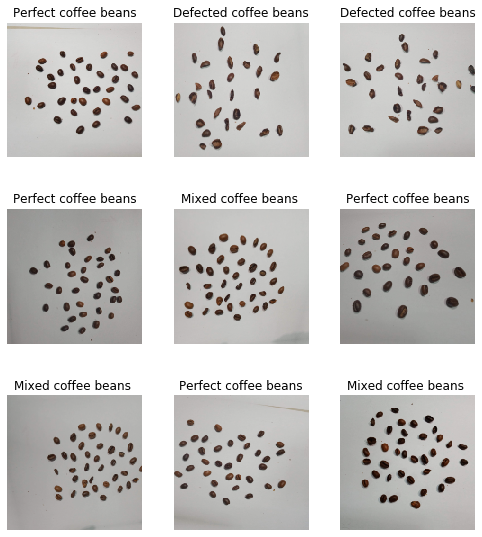

In [56]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [72]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.347709,1.778062,0.673469,03:23
1,0.706924,0.129879,0.948980,03:23


In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.048723,3.666884,0.607143,01:03
1,1.152160,3.688180,0.464286,01:02
2,1.229363,3.652308,0.535714,01:02
3,1.201995,3.564944,0.571429,01:02
4,1.139030,3.395319,0.535714,01:03


In [73]:
learn.predict(data.test_dl)

(Category Mixed coffee beans ,
 tensor(1),
 tensor([1.6798e-06, 9.9966e-01, 3.3922e-04]))

In [74]:
interp = ClassificationInterpretation.from_learner(learn)

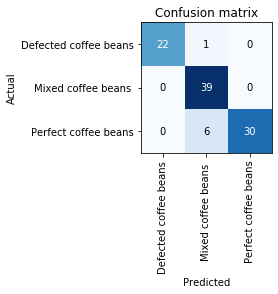

In [19]:
interp.plot_confusion_matrix()